In [688]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('../dataframe2.xlsx', sheet_name='Sheet1')
df

,Unnamed: 0,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,...,double,vowel,cumDup,cumVowel,percentage of hard mode,uncommonwords,easywords,easywordsband,hardwords,hardwordsband
0,NaN,560,manly,20380,1899,0,2,17,37,29,...,0,0,0,1,9.317959,0,19,"(3.94, 19.0]",14,"(1.932, 19.0]"
1,NaN,559,molar,21204,1973,0,4,21,38,26,...,0,1,0,2,9.304848,0,25,"(19.0, 34.0]",10,"(1.932, 19.0]"
2,NaN,558,havoc,20001,1919,0,2,16,38,30,...,0,1,0,2,9.594520,0,18,"(3.94, 19.0]",14,"(1.932, 19.0]"
3,NaN,557,impel,20160,1937,0,3,21,40,25,...,0,1,0,2,9.608135,0,24,"(19.0, 34.0]",10,"(1.932, 19.0]"
4,NaN,556,condo,20879,2012,0,2,17,35,29,...,1,1,1,2,9.636477,0,19,"(3.94, 19.0]",17,"(1.932, 19.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,NaN,206,drink,153880,3017,1,9,35,34,16,...,0,0,0,1,1.960619,0,45,"(34.0, 49.0]",6,"(1.932, 19.0]"
355,NaN,205,query,107134,2242,1,4,16,30,30,...,0,1,0,2,2.092706,0,21,"(19.0, 34.0]",19,"(1.932, 19.0]"
356,NaN,204,gorge,91477,1913,1,3,13,27,30,...,1,1,1,2,2.091236,0,17,"(3.94, 19.0]",26,"(19.0, 36.0]"
357,NaN,203,crank,101503,1763,1,5,23,31,24,...,0,0,0,1,1.736894,0,29,"(19.0, 34.0]",16,"(1.932, 19.0]"


In [689]:
df.drop(['Unnamed: 0','percentage of hard mode','%','easywords','hardwords','easywordsband','hardwordsband'], axis=1, inplace=True)
df = df.sort_values('Contest number', ascending=True)
df.drop('Contest number', axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
data = df.iloc[:, 1:10].copy().reset_index()
data

,index,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
0,0,80630,1362,1,3,23,39,24,9,1
1,1,101503,1763,1,5,23,31,24,14,2
2,2,91477,1913,1,3,13,27,30,22,4
3,3,107134,2242,1,4,16,30,30,17,2
4,4,153880,3017,1,9,35,34,16,5,1
...,...,...,...,...,...,...,...,...,...,...
354,354,20879,2012,0,2,17,35,29,14,3
355,355,20160,1937,0,3,21,40,25,9,1
356,356,20001,1919,0,2,16,38,30,12,2
357,357,21204,1973,0,4,21,38,26,9,1


In [690]:
data = data.iloc[:, 1:2].copy()
data

,Number of reported results
0,80630
1,101503
2,91477
3,107134
4,153880
...,...
354,20879
355,20160
356,20001
357,21204


<Figure size 500x300 with 0 Axes>

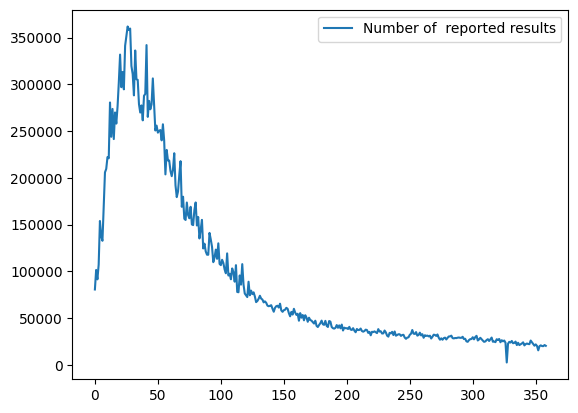

In [691]:
plt.figure(figsize=(5, 3))
data[:].plot()
plt.show()

In [692]:
# 取差作为输入
def difference(data_set,interval=1):
    diff=list()
    for i in range(interval,len(data_set)):
        value=data_set[i]-data_set[i-interval]
        diff.append(value)
    return pd.Series(diff)
 
# 这里的series是之前数据预处理后得到的DateFrame型数据
data=data.values
data_diff=difference(data,1)
data_diff

0       [20873]
1      [-10026]
2       [15657]
3       [46746]
4      [-16294]
         ...   
353       [868]
354      [-719]
355      [-159]
356      [1203]
357      [-824]
Length: 358, dtype: object

In [693]:
def timeseries_to_supervised(data,lag=1):
    df=pd.DataFrame(data)
    columns=[df.shift(1)]
    columns.append(df)
    df=pd.concat(columns,axis=1)
    df.fillna(0,inplace=True)
    return df
 
seq=timeseries_to_supervised(data_diff, 1)
data_seq=seq.values
data_seq

array([[0, array([20873], dtype=int64)],
       [array([20873], dtype=int64), array([-10026], dtype=int64)],
       [array([-10026], dtype=int64), array([15657], dtype=int64)],
       [array([15657], dtype=int64), array([46746], dtype=int64)],
       [array([46746], dtype=int64), array([-16294], dtype=int64)],
       [array([-16294], dtype=int64), array([-4860], dtype=int64)],
       [array([-4860], dtype=int64), array([36758], dtype=int64)],
       [array([36758], dtype=int64), array([36396], dtype=int64)],
       [array([36396], dtype=int64), array([3729], dtype=int64)],
       [array([3729], dtype=int64), array([12588], dtype=int64)],
       [array([12588], dtype=int64), array([-1247], dtype=int64)],
       [array([-1247], dtype=int64), array([59672], dtype=int64)],
       [array([59672], dtype=int64), array([-36658], dtype=int64)],
       [array([-36658], dtype=int64), array([29763], dtype=int64)],
       [array([29763], dtype=int64), array([-32238], dtype=int64)],
       [array([-

In [694]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
data_seq = scaler.fit_transform(data_seq)

In [695]:
data_size = len(data_diff)

test_ratio = 0.2
train_size = int(len(data_seq) * (1 - test_ratio))
test_size = len(data_seq) - train_size
data_train, data_test = data_seq[0:train_size], data_seq[train_size:len(data_seq)]

data_train.shape

(286, 2)

In [696]:
X,y=data_train[:,0:-1],data_train[:,-1]
X=X.reshape(X.shape[0],1,X.shape[1])
X.shape, y.shape

((286, 1, 1), (286,))

In [697]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU

 
model=Sequential()
model.add(GRU(4,batch_input_shape=(1,X.shape[1],X.shape[2]),stateful=True))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mse'])
 
# 构建一个LSTM模型并训练，样本数为1，训练次数为3，LSTM层神经元个数为4
model.fit(X,y,batch_size=1,verbose=1,epochs=5,shuffle=False)

Epoch 1/15
286/286 [==============================] - 4s 6ms/step - loss: 0.0480 - mse: 0.0480
Epoch 2/15
286/286 [==============================] - 2s 8ms/step - loss: 0.0447 - mse: 0.0447
Epoch 3/15
286/286 [==============================] - 3s 11ms/step - loss: 0.0425 - mse: 0.0425
Epoch 4/15
286/286 [==============================] - 2s 8ms/step - loss: 0.0410 - mse: 0.0410
Epoch 5/15
286/286 [==============================] - 3s 10ms/step - loss: 0.0401 - mse: 0.0401
Epoch 6/15
286/286 [==============================] - 3s 12ms/step - loss: 0.0396 - mse: 0.0396
Epoch 7/15
286/286 [==============================] - 2s 8ms/step - loss: 0.0393 - mse: 0.0393
Epoch 8/15
286/286 [==============================] - 3s 10ms/step - loss: 0.0391 - mse: 0.0391
Epoch 9/15
286/286 [==============================] - 3s 9ms/step - loss: 0.0390 - mse: 0.0390
Epoch 10/15
286/286 [==============================] - 3s 9ms/step - loss: 0.0390 - mse: 0.0390
Epoch 11/15
286/286 [========================

In [698]:
# 逆缩放
def invert_scale(scaler,X,y):
    new_row=[x for x in X]+[y]
    array=np.array(new_row)
    array=array.reshape(1,len(array))
    invert=scaler.inverse_transform(array)
    return invert[0,-1]

# 逆差分
def invert_difference(history,yhat,interval=1):
    return yhat+history[-interval]

In [699]:
predictions=list()
for i in range(len(data_test)):

    X,y=data_test[i,0:-1],data_test[i,-1]
    X=X.reshape(1,1,1)

    y_pre = model.predict(X)
    
    y_pre=invert_scale(scaler,X,y_pre)
    y_pre=invert_difference(data,y_pre,len(data_test)+1-i)
    predictions.append(y_pre)

1/1 [==============================] - 0s 65ms/step


In [700]:
diff=data[:][-1] - data[:][-2]
true_predict = [data[:][-1]]
for i in range(90):
    model_input = np.zeros((1,2))
    model_input[0,0] = diff
    model_input = scaler.transform(model_input)
    model_input = model_input.reshape(1,1,1,2)[:, :, :, 0]
    y_pre = model.predict(model_input)
    y_pre=invert_scale(scaler,X,y_pre)
    y_pre = y_pre + true_predict[-1]
    true_predict.append(y_pre)
    diff = true_predict[-1] - true_predict[-2]

1/1 [==============================] - 0s 42ms/step


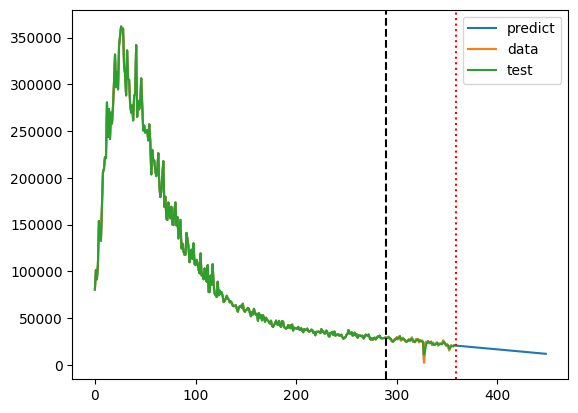

<Figure size 640x480 with 0 Axes>

In [718]:

predictions_new = data[:train_size].tolist()+predictions

true_predict_new = data[:data_size].tolist()+true_predict
# true_predict = data+true_predict

plt.plot(true_predict_new)
plt.plot(data[:])
plt.plot(predictions_new)
plt.legend(['predict','data','test'])
plt.axvline(x = 289,color = 'black',ls = '--')
plt.axvline(x = 359,color = 'red',ls = ':')
plt.show()
plt.savefig('predict.png')

In [ ]:
amount = true_predict[-1]
amount

array([10421.56010399])